In [1]:
import pyranges as pr
import seaborn as sns
import yaml
import os
import sys
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))+'/scripts/'
print(p)
sys.path.append(p)

from sm_utils import *


/Users/fairliereese/Documents/programming/mele_lab/projects/240706_pantranscriptome_cerberus_gtf_merge/scripts/


In [2]:
config = load_config()
od = '../../../'

In [3]:
analysis = 'pseudomasked_genomic_isoquant_guided'
tool = 'iq'
config_tsv = od+f'snakemake/config_{analysis}.tsv'
df = parse_config(config_tsv)
tech_rep = df.tech_rep.tolist()

## Before merging across samples

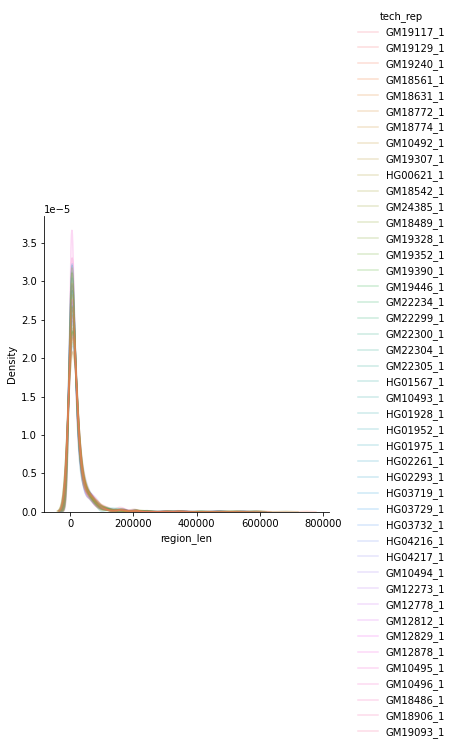

In [7]:
beds = expand(od+config['fmt']['novel_gene_bed'], 
       tech_rep=tech_rep,
       analysis=analysis)
df = pd.DataFrame()
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['tech_rep'] = t
    temp['source'] = 'single_sample'
    df = pd.concat([df, temp], axis=0)

df['region_len'] = df.End-df.Start
sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='tech_rep', alpha=0.25)

In [5]:
# sns.displot(df, kind='hist', x='region_len',
#             hue='source', multiple='dodge')

## After merging across samples

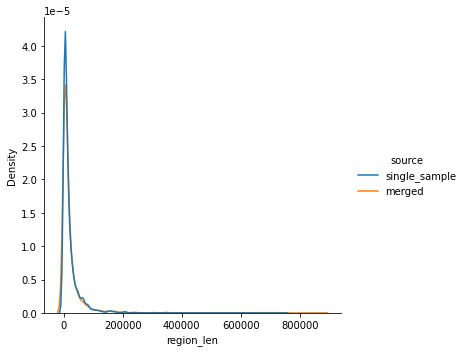

In [10]:
beds = expand(od+config['fmt']['novel_gene_merge_bed'], 
       analysis=analysis)
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['source'] = 'merged'
    df = pd.concat([df, temp], axis=0)

df['region_len'] = df.End-df.Start
sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='source')

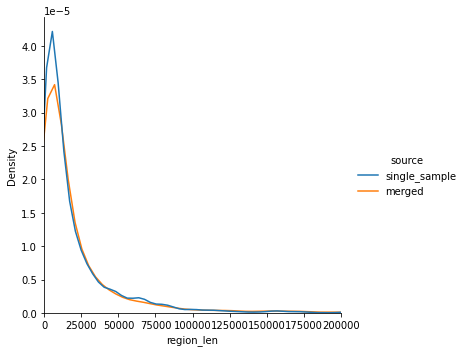

In [11]:
ax = sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='source')
ax.set(xlim=(-10,200000))

## Before merging across samples -- iq vs. espresso

In [39]:
analysis = 'pseudomasked_genomic_isoquant_guided'
tool = 'iq'
config_tsv = od+f'snakemake/config_{analysis}.tsv'
meta_df = parse_config(config_tsv)
tech_rep = meta_df.tech_rep.tolist()

In [40]:
beds = expand(od+config['fmt']['novel_gene_bed'], 
       tech_rep=tech_rep,
       analysis=analysis)
df = pd.DataFrame()
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['tech_rep'] = t
    temp['source'] = 'single_sample'
    temp['tool'] = tool
    df = pd.concat([df, temp], axis=0)

In [41]:
analysis = 'espresso_pseudomasked_genomic'
tool = 'espresso'
config_tsv = od+f'snakemake/config_{analysis}_expression.tsv'
meta_df = parse_config(config_tsv)
meta_df['analysis'] = analysis

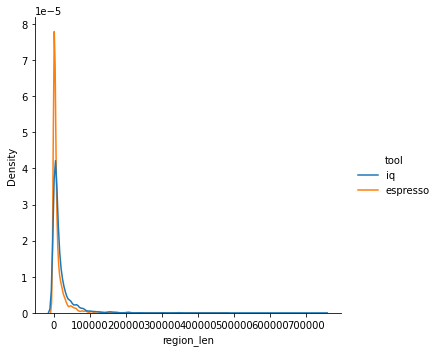

In [42]:
beds = expand(od+config['fmt']['novel_gene_bed'], 
       tech_rep=tech_rep,
       analysis=analysis)
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['tech_rep'] = t
    temp['source'] = 'single_sample'
    temp['tool'] = tool
    df = pd.concat([df, temp], axis=0)

df['region_len'] = df.End-df.Start
sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='tool')

In [38]:
df.tail()

,Chromosome,Start,End,Name,Score,Strand,tech_rep,source,tool,region_len
822,chrX,154477771,154478607,.,.,-,GM19093_1,single_sample,espresso,836
823,chrX,155524275,155612940,.,.,-,GM19093_1,single_sample,espresso,88665
824,chrY,13703872,13706016,.,.,+,GM19093_1,single_sample,espresso,2144
825,chrY,12661317,12663501,.,.,-,GM19093_1,single_sample,espresso,2184
826,chrY,16174485,16176543,.,.,-,GM19093_1,single_sample,espresso,2058


## After merging across samples -- iq vs. espresso

In [43]:
analysis = 'pseudomasked_genomic_isoquant_guided'
tool = 'iq'
config_tsv = od+f'snakemake/config_{analysis}.tsv'
meta_df = parse_config(config_tsv)
tech_rep = meta_df.tech_rep.tolist()

In [44]:
beds = expand(od+config['fmt']['novel_gene_merge_bed'], 
       analysis=analysis)
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['source'] = 'merged'
    temp['tool'] = tool
    df = pd.concat([df, temp], axis=0)

In [45]:
analysis = 'espresso_pseudomasked_genomic'
tool = 'espresso'
config_tsv = od+f'snakemake/config_{analysis}_expression.tsv'
meta_df = parse_config(config_tsv)
meta_df['analysis'] = analysis

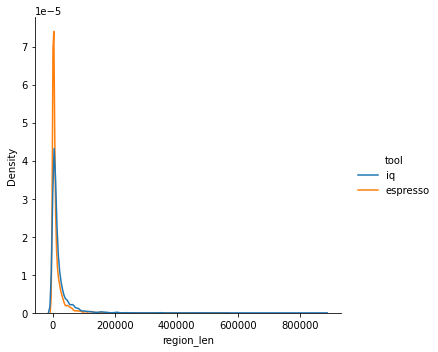

In [47]:
beds = expand(od+config['fmt']['novel_gene_merge_bed'], 
       analysis=analysis)
for f, t in zip(beds, tech_rep):
    temp = pr.read_bed(f).df
    temp['source'] = 'merged'
    temp['tool'] = tool
    df = pd.concat([df, temp], axis=0)

df['region_len'] = df.End-df.Start
sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='tool')

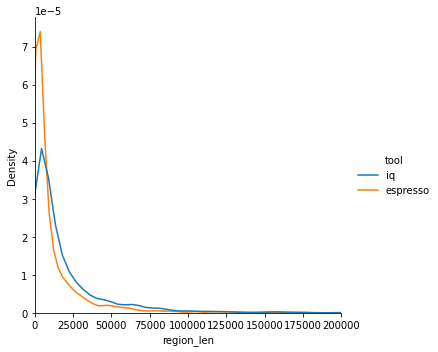

In [49]:
ax = sns.displot(df, kind='kde', common_norm=False, x='region_len',
            hue='tool')
ax.set(xlim=(-10,200000))